## Observations and Insights 

In [208]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Study_data=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="left")

# Display the data table for preview
Mouse_Study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [209]:
# Checking the number of mice.

Number_of_Mouse=Mouse_Study_data["Mouse ID"].count()
Number_of_Mouse


1893

In [210]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
reduced_mouse_df = Mouse_Study_data[["Mouse ID","Timepoint"]]

reduced_mouse_df

duplicate = reduced_mouse_df[reduced_mouse_df.duplicated()]

duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [211]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data_g989 = Mouse_Study_data.loc[Mouse_Study_data["Mouse ID"]=="g989"]

duplicate_data_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [212]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_drop_data=Mouse_Study_data.drop_duplicates(subset=['Mouse ID','Timepoint'])

duplicate_drop_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [213]:
# Checking the number of mice in the clean DataFrame.
Number_of_Mouse=duplicate_drop_data["Mouse ID"].count()
Number_of_Mouse

1888

## Summary Statistics

In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
duplicated_groupby = duplicate_drop_data.groupby("Drug Regimen")
duplicated_groupby_tumor = duplicated_groupby ["Tumor Volume (mm3)"]
mouse_regiment_mean= duplicate_drop_data.groupby("Drug Regimen").mean("Tumor Volume (mm3)")
mouse_regiment_median= duplicate_drop_data.groupby("Drug Regimen").median("Tumor Volume (mm3)")
mouse_regiment_var= duplicate_drop_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].values
mouse_regiment_std= duplicate_drop_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].values
mouse_regiment_sem= duplicate_drop_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].values
mouse_regiment_mean_df = mouse_regiment_mean["Tumor Volume (mm3)"]
mouse_regiment_median_df=mouse_regiment_median["Tumor Volume (mm3)"]
drug_regimen = pd.DataFrame({"Mean":mouse_regiment_mean_df,"Median":mouse_regiment_median_df ,
                            "Var":mouse_regiment_var,"Standard Deviation":mouse_regiment_std,
                             "SEM" : mouse_regiment_sem
                            })

drug_regimen



,Mean,Median,Var,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [215]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

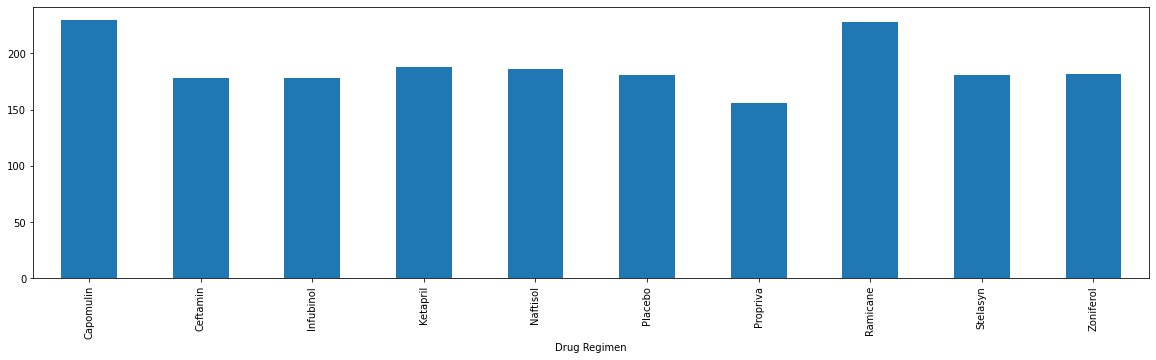

In [216]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen["Count"] = duplicate_drop_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"].values
drug_regimen
drug_plot =drug_regimen.Count.plot(kind="bar", figsize=(20,5))



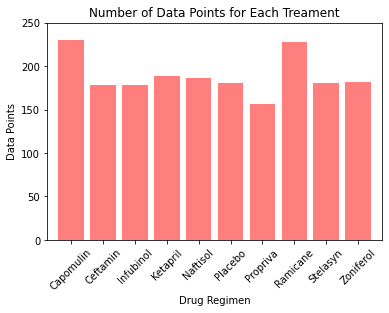

In [217]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_count = drug_regimen["Count"]
drug_regimen_count_leng = len(drug_regimen["Count"])
drug_regimen_count_leng
drug_regimen_count_df =np.arange(drug_regimen_count_leng)

drug_regimen_count_df
plt.bar(drug_regimen_count_df, drug_regimen_count, color='r', alpha=0.5, align="center")

tick_locations = [value for value in drug_regimen_count_df]
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation=45)
plt.xlim(-0.75, len(drug_regimen_count_df)-0.25)
plt.ylim(0, max(drug_regimen_count)+20)
plt.title("Number of Data Points for Each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

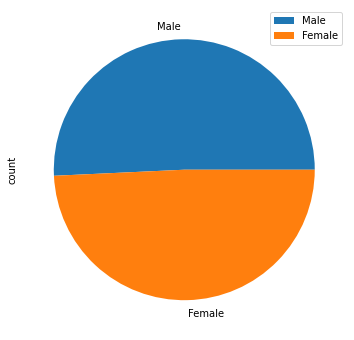

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drug_sex = duplicate_drop_data["Sex"].value_counts()
drug_sex_df = pd. DataFrame({"count":drug_sex})
drug_sex_df 

drug_sex_df.plot.pie(y ='count',figsize=(6,6))
plt.show()


([<matplotlib.patches.Wedge at 0x165fddb7e20>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

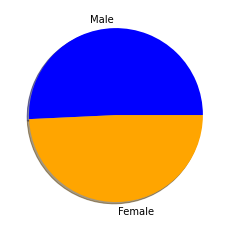

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Male","Female"]
explode = (0,0)
colors = ["blue", "orange"]
plt.pie(drug_sex, explode=explode, labels=labels, colors=colors, shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# starttime_min =min (duplicate_drop_data["Timepoint"])
# endtime_max =max (duplicate_drop_data["Timepoint"])
# duplicate_drop_data_max_time = duplicate_drop_data.loc[duplicate_drop_data["Timepoint"] == endtime_max]
# duplicate_drop_data_max_time.groupby("Drug Regimen").sum("Tumor Volume (mm3)")

start_time= Mouse_Study_data[Mouse_Study_data["Timepoint"]==0]
start_time
end_time= Mouse_Study_data[Mouse_Study_data["Timepoint"]==45]
end_time
start_time_mean_volume= start_time.groupby("Drug Regimen").mean("Tumor Volume (mm3)")
end_time_mean_volume
end_time_mean_volume= end_time.groupby("Drug Regimen").mean("Tumor Volume (mm3)")
end_time_mean_volume

difference = (end_time_mean_volume-start_time_mean_volume)/start_time_mean_volume
top_4_values = difference.sort_values("Tumor Volume (mm3)")
top_4_values.head()
end_time=end_time.set_index('Drug Regimen')
end_time
merge_df = pd.merge(top_4_values,end_time,on ='Drug Regimen', how ="left")

merge_df

output = merge_df[['Tumor Volume (mm3)_y']]

output
output.columns = ['Final Tumor Volume']
output
tumor_sizes_list = output['Final Tumor Volume'].values
tumor_sizes_list
quartiles = output['Final Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outbound_outlier = output['Final Tumor Volume'] > upper_bound
outbound_outlier
inbound_outlier = output['Final Tumor Volume'] < lower_bound
inbound_outlier
total_outlier = sum (outbound_outlier) +sum (inbound_outlier)
total_outlier

print("There is " + str(total_outlier) +" outlier")

There is 0 outlier


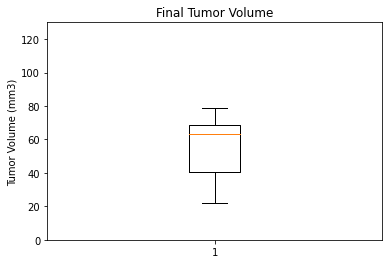

In [221]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_sizes_list)
ax1.set_ylim(0,130)
plt.show()

## Line and Scatter Plots

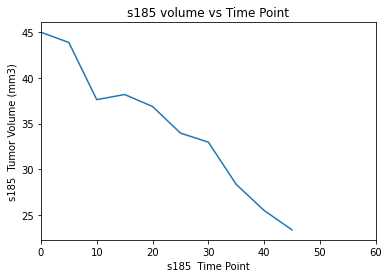

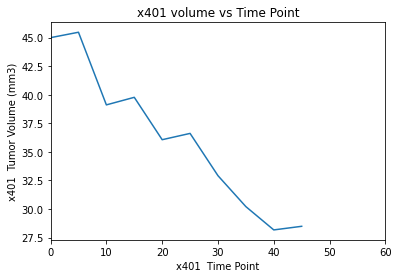

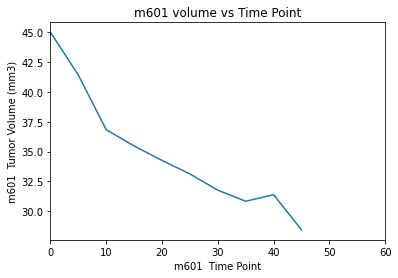

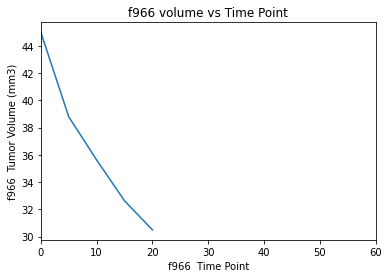

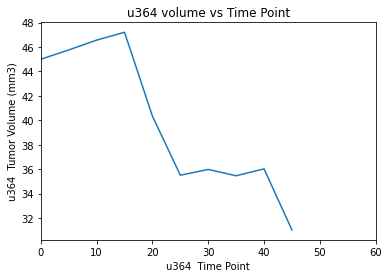

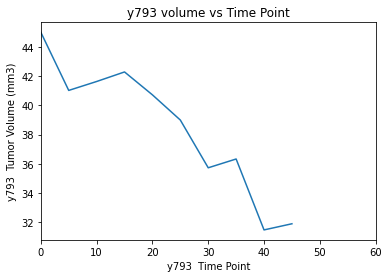

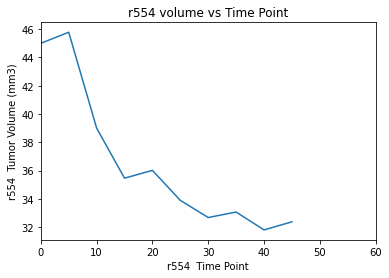

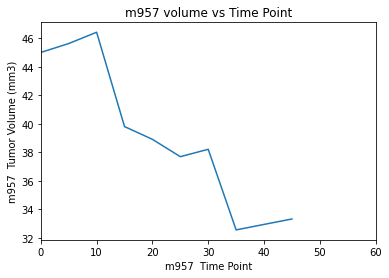

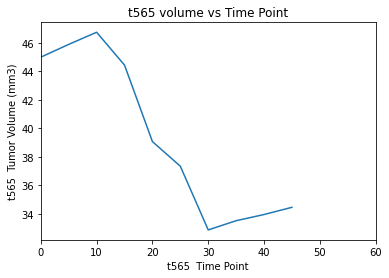

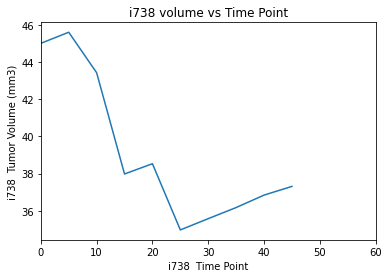

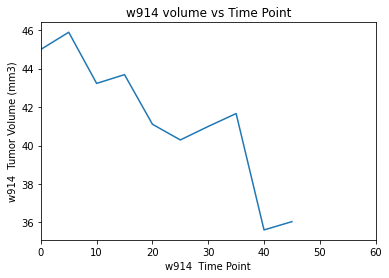

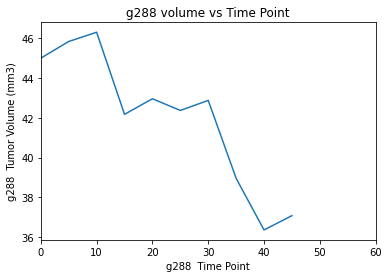

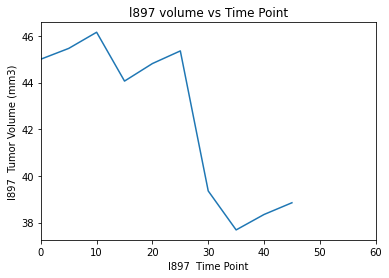

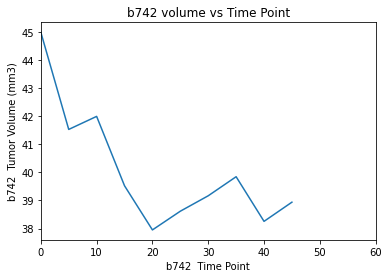

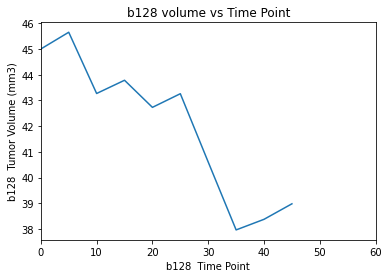

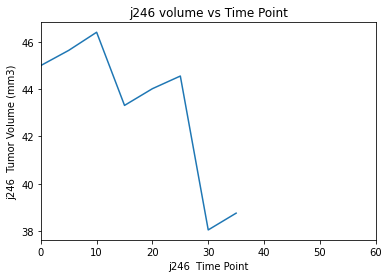

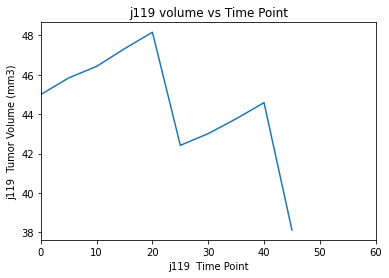

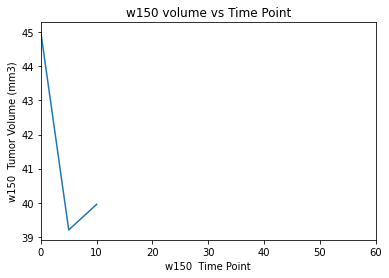

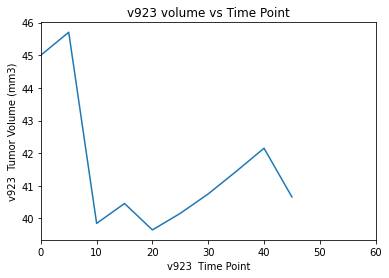

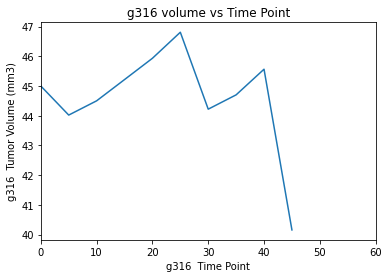

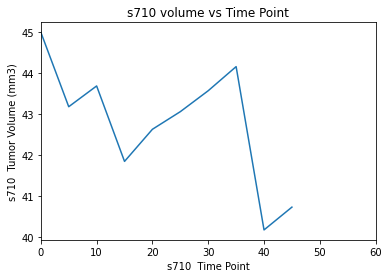

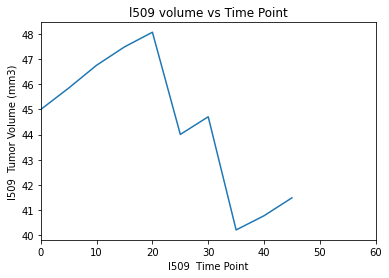

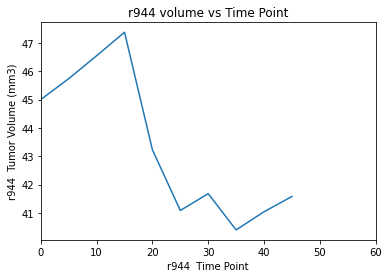

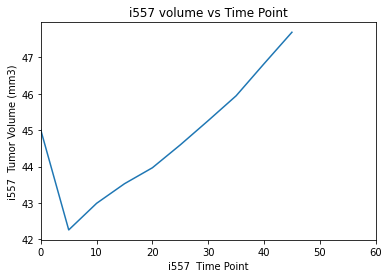

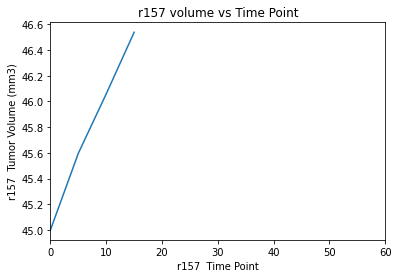

In [222]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse_ID=input("Enter name of mouse for which you are looking for data treated with Capomulin: ")
Mouse_Study_data_capomulin = Mouse_Study_data [Mouse_Study_data["Drug Regimen"]=="Capomulin"]
Mouse_Study_data_capomulin 
mouse_name_df =  Mouse_Study_data_capomulin["Mouse ID"].unique()
for Mouse_ID in mouse_name_df:
    Mouse_Study_data_mouseid = Mouse_Study_data_capomulin [Mouse_Study_data_capomulin["Mouse ID"]== Mouse_ID]
    Mouse_Study_data_mouseid 
    x_axis = Mouse_Study_data_mouseid  ["Timepoint"]
    x_axis
    y_axis = Mouse_Study_data_mouseid ["Tumor Volume (mm3)"]
    plt.plot(x_axis, y_axis )
    plt.xlabel(Mouse_ID + "  Time Point")
    plt.ylabel(Mouse_ID + "  Tumor Volume (mm3)")
    plt.title(Mouse_ID + " volume vs Time Point")
    plt.xlim(0,50,5)
    plt.xlim(0,60)
    plt.show()

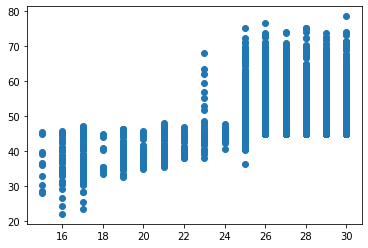

In [223]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Mouse_Study_data_weight = Mouse_Study_data[["Weight (g)","Tumor Volume (mm3)"]]
# Mouse_Study_data_weight
# Mouse_Study_data_weight.plot.scatter("Weight (g)", "Tumor Volume (mm3)")
# plt.show()

Mouse_Study_data_weight = Mouse_Study_data["Weight (g)"]
Mouse_Study_data_weight
Mouse_Study_data_volume = Mouse_Study_data["Tumor Volume (mm3)"]
Mouse_Study_data_volume 
plt.scatter(Mouse_Study_data_weight,Mouse_Study_data_volume )
plt.show()

## Correlation and Regression

The correlation between both factors is 0.59
The r-squared is: 0.3451544396399229


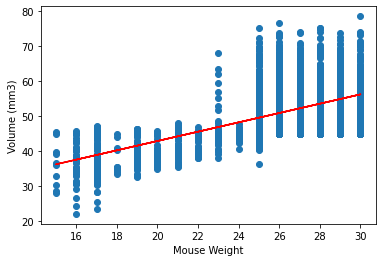

In [233]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Mouse_Study_data_weight = Mouse_Study_data["Weight (g)"]
Mouse_Study_data_weight
Mouse_Study_data_volume = Mouse_Study_data["Tumor Volume (mm3)"]
Mouse_Study_data_volume 
correlation = st.pearsonr(Mouse_Study_data_weight,Mouse_Study_data_volume )
correlation 

print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Mouse_Study_data_weight,Mouse_Study_data_volume)
regress_values = Mouse_Study_data_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq 

plt.scatter(Mouse_Study_data_weight,Mouse_Study_data_volume)
plt.plot(Mouse_Study_data_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Volume (mm3)')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()